In [1]:
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize, sent_tokenize
import nltk
import sklearn.datasets
import sklearn.metrics
import sklearn.model_selection
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Download the 'stopwords' and 'punkt' from the Natural Language Toolkit, you can comment the next lines if already present.
nltk.download('stopwords')
nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('tagsets')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# Load the dataset into memory from the filesystem
def load_data(dir_name):
    return sklearn.datasets.load_files('data/%s' % dir_name, encoding='utf-8')


def load_train_data():
    return load_data('train')


def load_test_data():
    return load_data('test')

In [4]:
# Extract features from a given text
def extract_features(text):
    bag_of_words = [x for x in wordpunct_tokenize(text)]
    words = [word.lower() for word in bag_of_words if word.isalpha()]
    sent_end = set([".", "?", "!"])
    end_count = 0
    tagged = nltk.pos_tag(bag_of_words)
    vocab_list = []
    com_words_eng = []
    
    with open("C:/Aumkar/Data Science Masters/Sem 3/Text Mining/Assignment 10/words.txt") as f:
        for line in f:
            com_words_eng.append(line.strip())
    
    features = []
    
    # Example feature 1: count the number of words
    features.append(len(bag_of_words))

    # Example feature 2: count the number of words, excluded the stopwords
    features.append(len([x for x in bag_of_words if x.lower() not in stop_words]))
    
    
    # Average number of words per sentence
    for i in bag_of_words:
        if i in sent_end:
            end_count += 1
    features.append((len(bag_of_words) - end_count)/float(end_count))
    
    #Number of commas in text
    features.append(sum(line.count(",") for line in bag_of_words))
    
    #Count number of nouns    
    nouns = [word for word, tag in tagged if tag in ('NN', 'NNP', 'NNS', 'NNPS')]
    lower_nouns = [x.lower() for x in nouns]
    features.append(len([lower_nouns]))
    
    #Average number of nouns per sentence
    for i in lower_nouns:
        if i in sent_end:
            end_count += 1
    features.append((len(lower_nouns) - end_count)/float(end_count))
    
    #Count of common, singular nouns
    nouns_nn = [word for word, tag in tagged if tag in ('NN')]
    lower_nn = [x.lower() for x in nouns_nn]
    features.append(len([lower_nn]))
    
    #Average number of common, singular nouns per sentence
    for i in lower_nn:
        if i in sent_end:
            end_count += 1
    features.append((len(lower_nn) - end_count)/float(end_count))
    
    #Count of proper, singular nouns
    nouns_nnp = [word for word, tag in tagged if tag in ('NNP')]
    lower_nnp = [x.lower() for x in nouns_nnp]
    features.append(len([lower_nnp]))
    
    #Average number of proper, singular nouns per sentence
    for i in lower_nnp:
        if i in sent_end:
            end_count += 1
    features.append((len(lower_nnp) - end_count)/float(end_count))
    
    #Count of common, plural nouns
    nouns_nns = [word for word, tag in tagged if tag in ('NNS')]
    lower_nns = [x.lower() for x in nouns_nns]
    features.append(len([lower_nns]))  
    
    #Average number of common, plural nouns per sentence
    for i in lower_nns:
        if i in sent_end:
            end_count += 1
    features.append((len(lower_nns) - end_count)/float(end_count))
    
    #Count of proper, plural nouns
    nouns_nnps = [word for word, tag in tagged if tag in ('NNPS')]
    lower_nnps = [x.lower() for x in nouns_nnps]
    features.append(len([lower_nnps]))   
    
    #Average number of proper, plural nouns per sentence
    for i in lower_nnps:
        if i in sent_end:
            end_count += 1
    features.append((len(lower_nnps) - end_count)/float(end_count))
    
    #Count number of verbs    
    verbs = [word for word, tag in tagged if tag in ('VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ')]
    lower_verbs = [x.lower() for x in verbs]
    features.append(len([lower_verbs]))
    
    #Average number of verbs per sentence
    for i in lower_verbs:
        if i in sent_end:
            end_count += 1
    features.append((len(lower_verbs) - end_count)/float(end_count))
    
    #Count of verb, base form
    verbs_vb = [word for word, tag in tagged if tag in ('VB')]
    lower_vb = [x.lower() for x in verbs_vb]
    features.append(len([lower_vb]))
    
    #Average number of verbs, base form per sentence
    for i in lower_vb:
        if i in sent_end:
            end_count += 1
    features.append((len(lower_vb) - end_count)/float(end_count))
    
    #Count of verb, past tense
    verbs_vbd = [word for word, tag in tagged if tag in ('VBD')]
    lower_vbd = [x.lower() for x in verbs_vbd]
    features.append(len([lower_vbd]))
    
    #Average number of verbs, past tense per sentence
    for i in lower_vbd:
        if i in sent_end:
            end_count += 1
    features.append((len(lower_vbd) - end_count)/float(end_count))
    
    #Count of verb, present participle
    verbs_vbg = [word for word, tag in tagged if tag in ('VBG')]
    lower_vbg = [x.lower() for x in verbs_vbg]
    features.append(len([lower_vbg]))
    
    #Average number of verbs, present participle per sentence
    for i in lower_vbg:
        if i in sent_end:
            end_count += 1
    features.append((len(lower_vbg) - end_count)/float(end_count))
    
    #Count of verb, past participle
    verbs_vbn = [word for word, tag in tagged if tag in ('VBN')]
    lower_vbn = [x.lower() for x in verbs_vbn]
    features.append(len([lower_vbn]))
    
    #Average number of verbs, past participle per sentence
    for i in lower_vbn:
        if i in sent_end:
            end_count += 1
    features.append((len(lower_vbn) - end_count)/float(end_count))
    
    #Count of verb, present tense, not 3rd person singular
    verbs_vbp = [word for word, tag in tagged if tag in ('VBP')]
    lower_vbp = [x.lower() for x in verbs_vbp]
    features.append(len([lower_vbp]))
    
    #Average number of verbs, present tense, not 3rd person singular per sentence
    for i in lower_vbp:
        if i in sent_end:
            end_count += 1
    features.append((len(lower_vbp) - end_count)/float(end_count))
    
    #Count of verb, present tense, 3rd person singular
    verbs_vbz = [word for word, tag in tagged if tag in ('VBZ')]
    lower_vbz = [x.lower() for x in verbs_vbz]
    features.append(len([lower_vbz]))   
    
    #Average number of verbs, present tense, 3rd person singular per sentence
    for i in lower_vbz:
        if i in sent_end:
            end_count += 1
    features.append((len(lower_vbz) - end_count)/float(end_count))
    
    #Count number of adjectives    
    adjectives = [word for word, tag in tagged if tag in ('JJ', 'JJR', 'JJS')]
    lower_adj = [x.lower() for x in adjectives]
    features.append(len([lower_adj]))
    
    #Average number of adjectives per sentence
    for i in lower_adj:
        if i in sent_end:
            end_count += 1
    features.append((len(lower_adj) - end_count)/float(end_count))
    
    #Count number of adjectives (numeral or ordinal)    
    adj_jj = [word for word, tag in tagged if tag in ('JJ')]
    lower_jj = [x.lower() for x in adj_jj]
    features.append(len([lower_jj]))
    
    #Average number of adjectives (numeral/ordinal) per sentence
    for i in lower_jj:
        if i in sent_end:
            end_count += 1
    features.append((len(lower_jj) - end_count)/float(end_count))
    
    #Count number of adjectives, comparative  
    adj_jjr = [word for word, tag in tagged if tag in ('JJR')]
    lower_jjr = [x.lower() for x in adj_jjr]
    features.append(len([lower_jjr]))
    
    #Average number of adjectives, comparative per sentence
    for i in lower_jjr:
        if i in sent_end:
            end_count += 1
    features.append((len(lower_jjr) - end_count)/float(end_count))
    
    #Count number of adjectives, superlative  
    adj_jjs = [word for word, tag in tagged if tag in ('JJS')]
    lower_jjs = [x.lower() for x in adj_jjs]
    features.append(len([lower_jjs]))
    
    #Average number of adjectives, superlative per sentence
    for i in lower_jjs:
        if i in sent_end:
            end_count += 1
    features.append((len(lower_jjs) - end_count)/float(end_count))
    
    #Count number of adverbs    
    adverbs = [word for word, tag in tagged if tag in ('RB', 'RBR', 'RBS')]
    lower_adv = [x.lower() for x in adverbs]
    features.append(len([lower_adv]))  
    
    #Average number of adverbs per sentence
    for i in lower_adv:
        if i in sent_end:
            end_count += 1
    features.append((len(lower_adv) - end_count)/float(end_count))    
    
    #Count number of adverb   
    adv_rb = [word for word, tag in tagged if tag in ('RB')]
    lower_rb = [x.lower() for x in adv_rb]
    features.append(len([lower_rb]))
    
    #Average number of adverb per sentence
    for i in lower_rb:
        if i in sent_end:
            end_count += 1
    features.append((len(lower_rb) - end_count)/float(end_count)) 
    
    #Count number of adverbs, comparative  
    adv_rbr = [word for word, tag in tagged if tag in ('RBR')]
    lower_rbr = [x.lower() for x in adv_rbr]
    features.append(len([lower_rbr]))
    
    #Average number of adverbs, comparative per sentence
    for i in lower_rbr:
        if i in sent_end:
            end_count += 1
    features.append((len(lower_rbr) - end_count)/float(end_count)) 
    
    #Count number of adverbs, superlative  
    adv_rbs = [word for word, tag in tagged if tag in ('RBS')]
    lower_rbs = [x.lower() for x in adv_rbs]
    features.append(len([lower_rbs]))
    
    #Average number of adverbs, superlative per sentence
    for i in lower_rbs:
        if i in sent_end:
            end_count += 1
    features.append((len(lower_rbs) - end_count)/float(end_count)) 
        
    #Count number of interjections
    interjection_uh = [word for word, tag in tagged if tag in ('UH')]
    lower_uh = [x.lower() for x in interjection_uh]
    features.append(len([lower_uh]))
     
    #Average number of interjections per sentence
    for i in lower_uh:
        if i in sent_end:
            end_count += 1
    features.append((len(lower_uh) - end_count)/float(end_count))
    
    #Most 100 common words
    top_common = 100
    word_freq_dist = nltk.FreqDist(words)
    vocab = word_freq_dist.most_common(top_common)
    
    #Count of 100 most common words
    for i in vocab:
        vocab_list.append(i[1])
        
    features.extend(vocab_list)

    #Count of 1000 most common words in English
    for i in com_words_eng:
        features.append(words.count(i))

    return features

In [5]:
# Classify using the features
def classify(train_features, train_labels, test_features):
    # TODO: (Optional) If you would like to test different how classifiers would perform different, you can alter
    # TODO: the classifier here.
    clf = SVC(kernel='linear')
    clf.fit(train_features, train_labels)
    return clf.predict(test_features)

In [6]:
# Evaluate predictions (y_pred) given the ground truth (y_true)
def evaluate(y_true, y_pred):
    # TODO: What is being evaluated here and what does it say about the performance? Include or change the evaluation
    # TODO: if necessary.
    recall = sklearn.metrics.recall_score(y_true, y_pred, average='macro')
    print("Recall: %f" % recall)

    precision = sklearn.metrics.precision_score(y_true, y_pred, average='macro')
    print("Precision: %f" % precision)

    f1_score = sklearn.metrics.f1_score(y_true, y_pred, average='macro')
    print("F1-score: %f" % f1_score)

    return recall, precision, f1_score

In [7]:
# The main program
def main():
    train_data = load_train_data()

    # Extract the features
    features = list(map(extract_features, train_data.data))
    
    '''
    # Classify and evaluate
    skf = sklearn.model_selection.StratifiedKFold(n_splits=10)
    scores = []
    for fold_id, (train_indexes, validation_indexes) in enumerate(skf.split(train_data.filenames, train_data.target)):
        # Print the fold number
        print("Fold %d" % (fold_id + 1))

        # Collect the data for this train/validation split
        train_features = [features[x] for x in train_indexes]
        train_labels = [train_data.target[x] for x in train_indexes]
        validation_features = [features[x] for x in validation_indexes]
        validation_labels = [train_data.target[x] for x in validation_indexes]

        # Classify and add the scores to be able to average later
        y_pred = classify(train_features, train_labels, validation_features)
        scores.append(evaluate(validation_labels, y_pred))

        # Print a newline
        print("")

    # Print the averaged score
    recall = sum([x[0] for x in scores]) / len(scores)
    print("Averaged total recall", recall)
    precision = sum([x[1] for x in scores]) / len(scores)
    print("Averaged total precision", precision)
    f_score = sum([x[2] for x in scores]) / len(scores)
    print("Averaged total f-score", f_score)
    print("")
    
    '''
    # TODO: Once you are done crafting your features and tuning your model, also test on the test set and report your
    # TODO: findings. How does the score differ from the validation score? And why do you think this is?
    test_data = load_test_data()
    test_features = list(map(extract_features, test_data.data))
    #
    y_pred = classify(features, train_data.target, test_features)
    score = evaluate(test_data.target, y_pred)
    
    print(score)
    
# This piece of code is common practice in Python, is something like if "this file" is the main file to be ran, then
# execute this remaining piece of code. The advantage of this is that your main loop will not be executed when you
# import certain functions in this file in another file, which is useful in larger projects.

if __name__ == '__main__':
    main()

Recall: 0.651852
Precision: 0.704268
F1-score: 0.644396
(0.6518518518518518, 0.704268077601411, 0.6443963443963444)


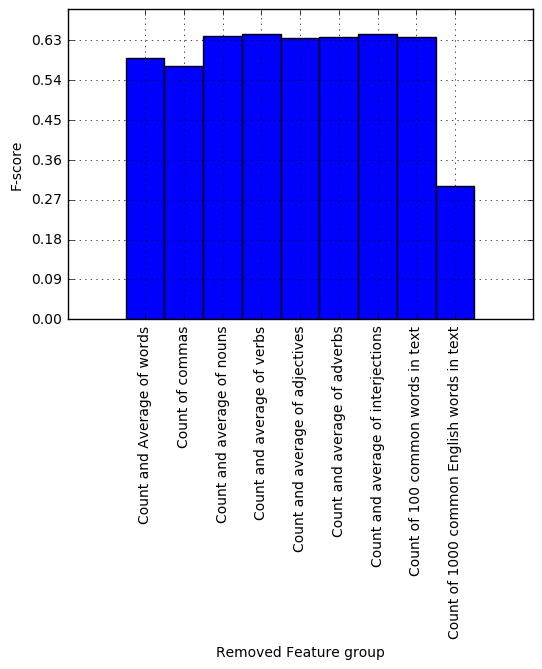

In [8]:
labels = np.array(['Count and Average of words', 'Count of commas', 'Count and average of nouns', 'Count and average of verbs', 'Count and average of adjectives', 'Count and average of adverbs', 'Count and average of interjections', 'Count of 100 common words in text', 'Count of 1000 common English words in text'])
xs = np.arange(len(labels))
ys = np.array([0.590731, 0.571996, 0.638894, 0.644396, 0.635944, 0.637465, 0.644396, 0.636590, 0.300957])
width = 1

plt.bar(xs, ys, width, align='center')

plt.xticks(xs, labels, rotation=90) #Replace default x-ticks with xs, then replace xs with labels
plt.yticks(np.arange(0, ys.max(), 0.09))
plt.xlabel('Removed Feature group')
plt.ylabel('F-score')
plt.grid(True)
plt.show()